> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Até agora, todo nosso trabalho tem sido em uma dimensão espacial (Passos [1](./01_Passo_1.ipynb) ao [4](./05_Passo_4.ipynb)). Podemos aprender muito apenas em 1D, mas vamos partir para as _planícies_: duas dimensões.

Nos exercícios à seguir, vamos estender os primeiros quatro passos para 2D. Para expandir as fórmulas 1D de diferenças finitas para diferenciais parciais em 2D ou 3D, apenas aplique a definição: a derivada parcial com respeito a $x$ é a variação na direção $x$ com $y$ *constante*.

No espaço 2D, uma malha retangular (uniforme) é definida por pontos com coordenadas:

$$x_i = x_0 +i \Delta x$$

$$y_j = y_0 +j \Delta y$$

Agora, definimos $u_{i,j} = u(x_i,y_j)$ e aplicamos os esquemas de diferenças finitas em cada variável $x,y$ *agindo separadamente* nos índices $i$ e $j$. Todas as derivadas são beseadas na expansão de Taylor 2D no ponto da malha ao redor de $u_{i,j}$.

Assim, para a derivada espacial de primeira ordem na direção $x$, a fórmula de diferenças finitas é:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

e de maneira similar na diração $y$. Dessa maneira, podemos escrever os esquemas de diferenças para frente, diferenças para trás ou diferenças centradas dos Passos 5 ao 12. Vamos começar!

Passo 5: Convecção Linear 2D
----
***

A EDP que governa a convecção linear 2D é escrita como

$$\frac{\partial u(x,y)}{\partial t}+c\frac{\partial u(x,y)}{\partial x} + c\frac{\partial u(x,y)}{\partial y} = 0$$

Essa é exatamente a mesma forma vista na equação linear 1D, exceto que agora tem duas dimensões espaciais para se levar em conta quando avançamos no tempo.

Novamente, o passo de tempo será discretizado com diferença para frente, enquando ambas coordenadas espaciais serão discretizadas com esquemas de diferença para trás.

Na implementação 1D, usamos o subscrito $i$ para representar o movimento no espaço (por exemplo, $u_{i}^n-u_{i-1}^n$). Agora que temos que considerar duas dimensões, vamos precisar adicionar um segundo subscrito, $j$, para considerar toda a informação do problema.

Aqui, vamos usar $i$ novamente como índice para nossos valores em $x$, e vamos adicionar o índice $j$ para marcar valores em $y$.

Com isso em mente, a discretização da nossa EDP pode ser bastante direta

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0.$$

Como antes, isolamos a incógnita

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

Vamos resolver a equação com a seguinte condição inicial (CI):

$$u(x,y) = \begin{cases}
\begin{matrix}
2 & \text{ se } 0,5 \leq x, y \leq 1 \cr
1 & \text{senão}\end{matrix}\end{cases}$$

e as condições de contorno:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

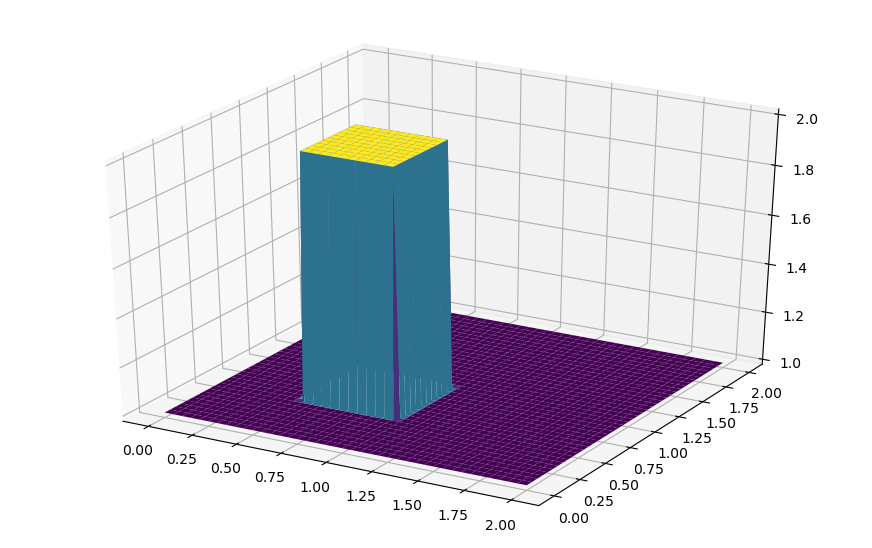

In [1]:
## Nova biblioteca necessária para gráficos em projeções 3D
from mpl_toolkits.mplot3d import Axes3D

import numpy
from matplotlib import pyplot, cm
%matplotlib inline

###Declaração das variáveis
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((nx, ny)) ##Cria um vetor ny x nx com 1
un = numpy.ones((nx, ny)) ##

###Assinala a condição Inicial

##CI função chapéu : u(0,5<=x<=1 && 0,5<=y<=1 ) is 2
u[int(.5 / dx):int(1 / dx + 1),int(.5 / dy):int(1 / dy + 1)] = 2 

###Gráfica da Condição Inicial
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis)

### Notas sobre o Gráfico 3D

Para produzir a projeção 3D dos resultados, tenha certeza de que tenha adicionardo a biblioteca Axes3D.

```python
from mpl_toolkits.mplot3d import Axes3D
```

O comando gráfico atual envolve alguns comandos a mais que uma simples curva 2D.

```python
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:].T)
```

A primeira linha aqui é a inicialização da janela da figura. Os comandos **figsize** e **dpi** são opcionais, e simplesmente especificam o tamanho e resolução da figura sendo criada. Eles podem ser omitidos, mas você anda vai precisar do

```python
fig = pyplot.figure()
```

As linhas seguintes assinalam a janela gráfica para a etiqueta 'ax' e também especificam que ela será uma projeção 3D. A última linha usa o comando

```python    
plot_surface()
```

que é equivalente ao comando plot padrão, mas ele recebe os valores da malha X e Y para os valores da posição dos pontos.

##### Nota

Os valores `X` e `Y` que são passados como argumento para `plot_surface` não são os mesmos vetores 1D `x` e `y`. Para usar as funções gráficas Matplotlib 3D, você precisa gerar uma malha de `x, y` valores que correspondem a cada coordenada na estrutura do gráfico. Essas coordenadas são produzidas usando a função numpy `meshgrid`.

```python
X, Y = numpy.meshgrid(x, y)
``` 

Observe que, por definição, a biblioteca funciona com os índices opostos a nossa definição $i, j$. Então informamos como argumento a transposta da nossa função, isto é, `u[:].T`.

### Iterando em duas dimensões

A avaliação da onda em duas dimensões demanda o uso de diversos laços `for` aninhados para cobrir todos $i, j, n$. Uma vez que Python é uma linguagem interpretada (não compilada), pode-se notar considerável lentidão na execução de multiplos laços `for`. Primeiro, vamos verificar o código da convecção 2D e ver os resultaados produzidos.

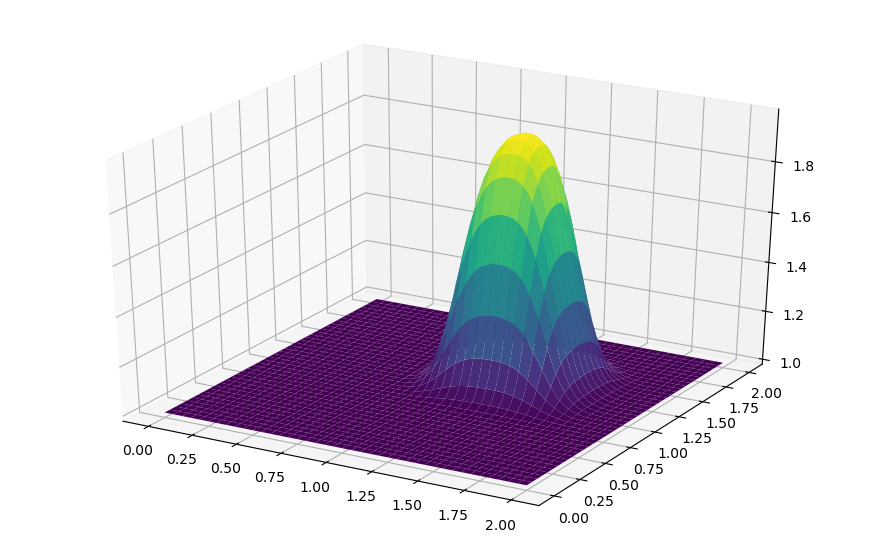

In [2]:
u = numpy.ones((nx, ny))
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for i in range(1, row):
        for j in range(1, col):
            u[i, j] = (un[i, j] - (c * dt / dx * (un[i, j] - un[i-1, j])) -
                                  (c * dt / dy * (un[i, j] - un[i, j-1])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis)

Operações de Arranjos
----------------

Aqui o mesmo código de convecção 2D é implementado, mas em vez de usar laços `for` aninhados, o mesmo cálculo é avaliado usando operações de arranjos.

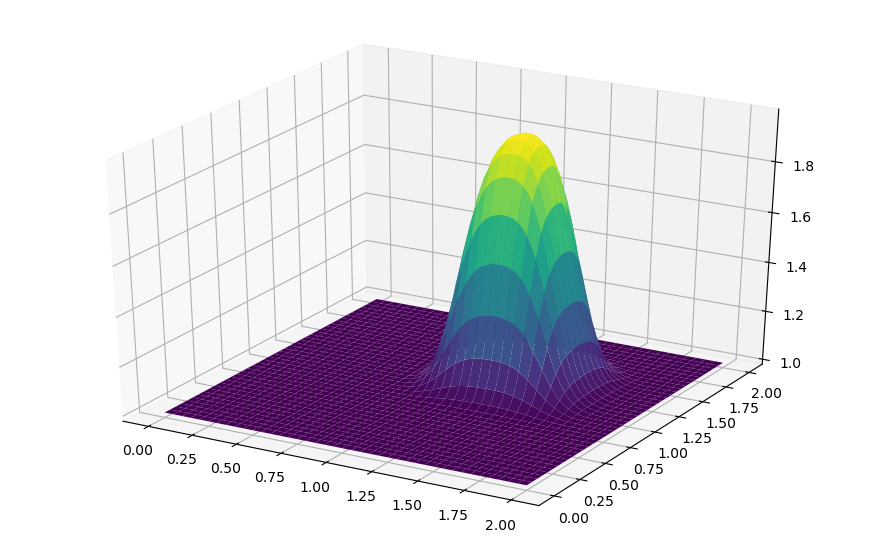

In [3]:
u = numpy.ones((nx, ny))
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

for n in range(nt + 1): ##Laço temporal
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) -
                              (c * dt / dy * (un[1:, 1:] - un[1:, :-1])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis)   

Material Complementar
-----
***

O lição em video que cobre os detalhes para o Passo 5 (e adiante até o Passo 8) é **_Video Lesson 6_** no YouTube:

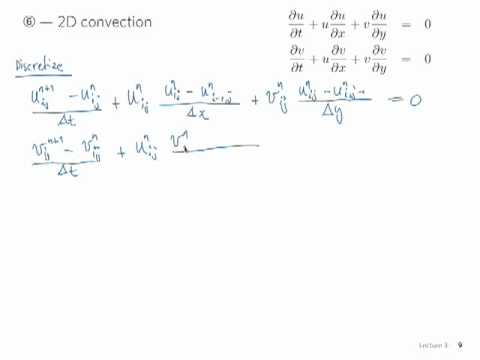

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).